In [1]:
import numpy as np
import torch
import torchvision
from torchvision import transforms

In [2]:
import os
!pip install dill
import dill
device = "cuda" if torch.cuda.is_available() else "cpu"

### Mnist

In [6]:
IMG_SIZE = 32
#定義img_transform
img_transform = [
    transforms.Resize(IMG_SIZE),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # Scales data into [0,1]
    transforms.Lambda(lambda x: x.to(device)),
    transforms.Lambda(lambda t: (t * 2) - 1), # Scale between [-1, 1]
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))
    ]
img_transform = transforms.Compose(img_transform)

dataset = torchvision.datasets.MNIST(
    root='./mnist',
    train=False,
    transform = img_transform,
    download=True
)

In [7]:
label_dict = {i:[] for i in range(10)}
for i, d in enumerate(dataset):
    for j in range(10):
        if d[1] == j:
            label_dict[j].append(int(i))
# 取少量資料
# indices = torch.arange(300) # take first 300 pictures
indices = torch.Tensor(np.array([label_dict[i][:30] for i in range(10)]).flatten()).int() # take 30 pictures from each label
dataset = torch.utils.data.Subset(dataset, indices)

In [8]:
if not os.path.exists("./dataProcessed/"):
    os.makedirs("./dataProcessed/")

with open('./dataProcessed/mnist_dataset.pkl', 'wb') as file:
    dill.dump(dataset, file)

### CelebA

In [5]:
IMG_SIZE = 64
img_transform = [
    transforms.CenterCrop(178),
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # Scales data into [0,1]
    transforms.Lambda(lambda x: x.to(device)),
    transforms.Lambda(lambda t: (t * 2) - 1) # Scale between [-1, 1]
    ]
img_transform = transforms.Compose(img_transform)

dataset = torchvision.datasets.CelebA(
    root='.',
    transform = img_transform,
    download=False
)
# 取少量資料
indices = torch.arange(100)
dataset = torch.utils.data.Subset(dataset, indices)

In [6]:
if not os.path.exists("./dataProcessed/"):
    os.makedirs("./dataProcessed/")

with open('./dataProcessed/celebA_dataset.pkl', 'wb') as file:
    dill.dump(dataset, file)

### Cifar10

In [3]:
IMG_SIZE = 64
img_transform = [
    transforms.CenterCrop(178),
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # Scales data into [0,1]
    transforms.Lambda(lambda x: x.to(device)),
    transforms.Lambda(lambda t: (t * 2) - 1) # Scale between [-1, 1]
    ]
img_transform = transforms.Compose(img_transform)

dataset = torchvision.datasets.CIFAR10(
    root='.',
    transform = img_transform,
    download=True
)
# 取少量資料
indices = torch.arange(200)
dataset = torch.utils.data.Subset(dataset, indices)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [4]:
if not os.path.exists("./dataProcessed/"):
    os.makedirs("./dataProcessed/")

with open('./dataProcessed/cifar10_dataset.pkl', 'wb') as file:
    dill.dump(dataset, file)

In [9]:
def linear_beta_schedule(timesteps=100, start=1e-5, end=0.02):
    '''
    return a tensor of a linear schedule
    '''
    return torch.linspace(start, end, timesteps)
    
def cosine_beta_schedule(timesteps, s=0.008):
    """
    cosine schedule as proposed in https://arxiv.org/abs/2102.09672
    """
    steps = timesteps + 1
    x = torch.linspace(0, timesteps, steps)
    alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * torch.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, 0.0001, 0.9999)

In [10]:
import matplotlib.pyplot as plt

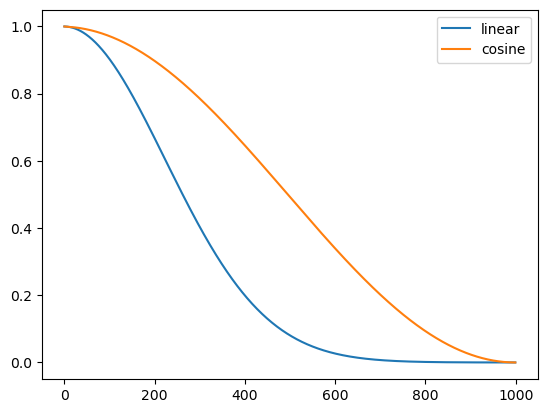

In [13]:
def alpha_cumprod_cal(betas):
  alphas = 1-betas
  return torch.cumprod(alphas, dim=0)

T = 1000
lin_betas = linear_beta_schedule(timesteps=T)
cos_betas = cosine_beta_schedule(timesteps=T)

plt.plot(alpha_cumprod_cal(lin_betas), label="linear")
plt.plot(alpha_cumprod_cal(cos_betas), label="cosine")
plt.legend()
plt.show()